<a href="https://colab.research.google.com/github/KoushaniBiswas/Incarnation-/blob/master/NMA_W0D1_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries for implementing LIF
import numpy as np
impor matplotlib.pyplot as plt

In [1]:
# defining the values required to implement the LIF 
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


In [ ]:
# computing the values of the synaptic input that is in the form of a sinusoid
import numpy as np
# initialize t
t = 0
# loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):
  t = step * dt
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
  print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688176e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


In [ ]:
# formatting variables to desired decimal places
import numpy as np
# initialise the step_end
step_end = 10

# loop for step_end
for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
  print(f'{t:.3f} {i:.4e}')


0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


In [ ]:
import numpy as numpy
# initialize step_end and v
step_end = 10
v = el
#loop for step_end and step
for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
  print(f'{t:.3f} {v:.4e}')
  v = v + dt/tau * (el - v + r*1)

0.000 -6.0000e-02
0.001 5.0000e+06
0.002 9.7500e+06
0.003 1.4262e+07
0.004 1.8549e+07
0.005 2.2622e+07
0.006 2.6491e+07
0.007 3.0166e+07
0.008 3.3658e+07
0.009 3.6975e+07


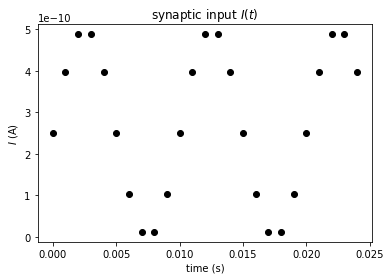

In [ ]:
#graphing the equation
import numpy as np
import matplotlib.pyplot as plt
#initialoze step_end
step_end = 25
#initialize the figure
plt.figure()
#loop for stpe_end steps
for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
  plt.plot(t, i, 'ko')
plt.title('synaptic input $I(t)$')
plt.xlabel('time (s)')
plt.ylabel(r'$I$ (A)')
plt.show()

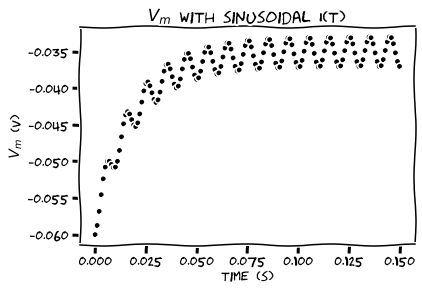

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# initialize step_end and v
step_end = int(t_max / dt)
v = el

with plt.xkcd():
  # initialize the figure
  plt.figure()
  # loop for step_end steps
  for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))
    plt.plot(t, v, 'k.')

    v = v + dt/tau * (el - v + r*i)

  t = t + dt
  plt.plot(t, v, 'k.')
  
  plt.title('$V_m$ with sinusoidal I(t)')
  plt.xlabel('time (s)')
  plt.ylabel(r'$V_m$ (V)')
  plt.show()

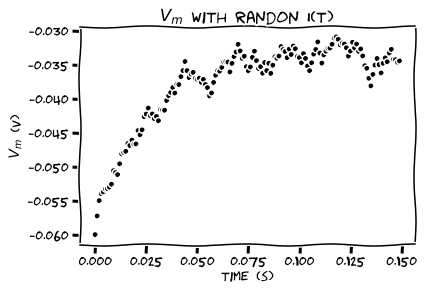

In [2]:
#plotting random synaptic input
import numpy as np
import matplotlib.pyplot as plt

# set random number generator
np.random.seed(2020)

# initialize step_end and v
step_end = int(t_max / dt)
v = el
t = 0
with plt.xkcd():
  plt.figure()
  plt.title('$V_m$ with randon I(t)')
  plt.xlabel('time (s)')
  plt.ylabel(r'$V_m$ (V)')
  #loop for step_end steps
  for step in range(step_end):
    t = step * dt
    plt.plot(t, v, 'k.')

    i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random() - 1))
    v = v + (dt / tau) * (el - v + r * i)
  plt.show()

<function matplotlib.pyplot.show>

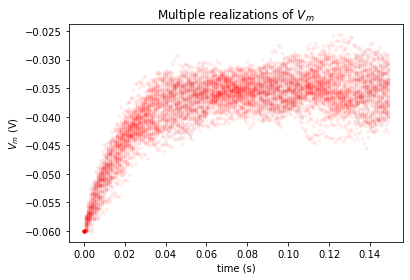

In [8]:
#ensemble statistics
#import lists
import numpy as np
import matplotlib.pyplot as plt
#set random number generator
np.random.seed()
#initialize step_end, n and v_n
step_end = int(t_max / dt)
n = 50
v_n = [el] * n
#initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel(r'$V_m$ (V)')

#loop fo step_end steps
for step in range(step_end):
  t = step * dt
  plt.plot([t] * n, v_n, 'r.', alpha=0.05)
  #alpha is a parameter to set the transparency
  #loop for n steps
  for j in range(0,n):
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
plt.show

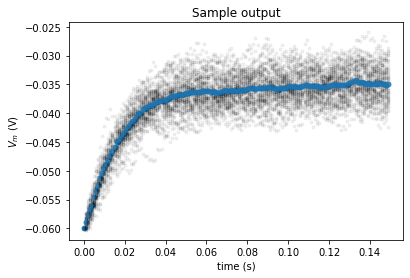

In [10]:
#incorporating sample mean in the above plot
np.random.seed()
#initializing step_end, v_n, n
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

#initialize the figure
plt.figure()
plt.title('Sample output')
plt.xlabel('time (s)')
plt.ylabel(r'$V_m$ (V)')

#loop for step_end steps
for step in range(step_end):
  t = step * dt

  v_mean = sum(v_n) / n
  plt.plot(n*[t], v_n, 'k.', alpha=0.05)
  plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)
  for j in range(0,n):
     i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random() - 1))
     v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
plt.show()

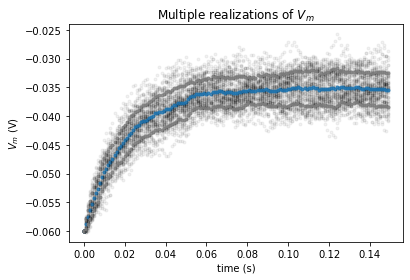

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# setting random number generator
np.random.seed()

#initialize step_end, n, v_n
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

#initializing the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel(r'$V_m$ (V)')

#loop for step ends
for step in range(step_end):
  t = step * dt
#compute and store the value of v_mean 
  v_mean = sum(v_n) / n
  #initializing the list v_var_n with comprehension over values of v_n
  v_var_n = [(v - v_mean)**2 for v in v_n]
  #compute sample variance v_var
  v_var = sum(v_var_n) / (n-1)
  #compute standard deviation 
  v_std = np.sqrt(v_var)

  plt.plot(n*[t], v_n, 'k.', alpha=0.05)
  plt.plot(t, v_mean, 'C0.', alpha=0.8)
  plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8) 
  plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)

  for j in range(0, n):
    i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random() - 1))
    v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
plt.show()